In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import cmocean.cm as cmo
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
from matplotlib.patches import Rectangle

In [2]:
path = "../data_for_plots/" 

In [3]:
HT = xr.open_mfdataset(path + "transient_heat_transports_0201-01-01_0300-12-30_NoML_zonal_vertical_integral.nc")
iso = xr.open_mfdataset(path + "isopycnal_heat_transports_0201-01-01_0300-12-30_NoML_zonal_vertical_integral.nc")

In [4]:
THTdivminusSTD = HT.THTdiv - HT.THTdivstd
THTdivplusSTD = HT.THTdiv + HT.THTdivstd
THTeddyminusSTD = HT.THTeddy - HT.THTeddystd
THTeddyplusSTD = HT.THTeddy + HT.THTeddystd
THTdiveddyminusSTD = HT.THTdiveddy - HT.THTdiveddystd
THTdiveddyplusSTD = HT.THTdiveddy + HT.THTdiveddystd
iso_totalminusSTD = iso.iso_total - iso.iso_totalstd
iso_totalplusSTD = iso.iso_total + iso.iso_totalstd
iso_totaleddyminusSTD = iso.iso_totaleddy - iso.iso_totaleddystd
iso_totaleddyplusSTD = iso.iso_totaleddy + iso.iso_totaleddystd

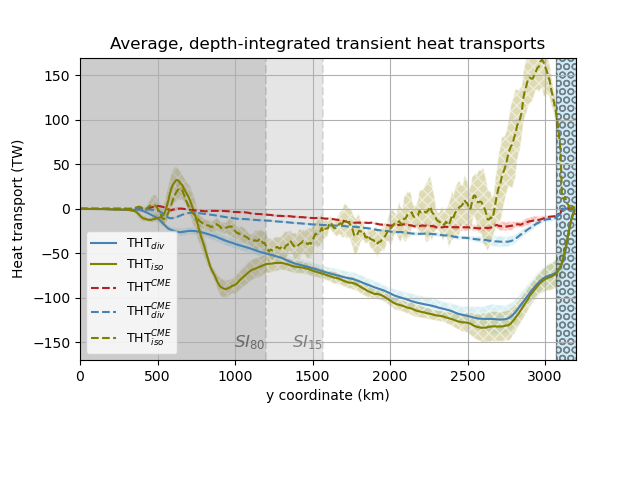

In [5]:
fig, ax = plt.subplots(1)

HT.THTdiv.plot(label="THT$_{div}$", color="steelblue", ls="-")
ax.fill_between(HT.YG, THTdivminusSTD, THTdivplusSTD, fc="powderblue", ec="w", hatch="xxx", alpha=0.5)
iso.iso_total.plot(label="THT$_{iso}$", color="olive", ls="-")
ax.fill_between(iso.YG, iso_totalminusSTD, iso_totalplusSTD, fc="darkkhaki", ec="w", hatch="xxx", alpha=0.5)
HT.THTeddy.plot(label="THT$^{CME}$", color="firebrick", ls="--")
ax.fill_between(HT.YG, THTeddyminusSTD, THTeddyplusSTD, fc="salmon", ec="w", hatch="xxx", alpha=0.5)
HT.THTdiveddy.plot(label="THT$_{div}^{CME}$", color="steelblue", ls="--")
ax.fill_between(HT.YG, THTdiveddyminusSTD, THTdiveddyplusSTD, fc="powderblue", ec="w", hatch="xxx", alpha=0.5)
iso.iso_totaleddy.plot(label="THT$_{iso}^{CME}$", color="olive", ls="--")
ax.fill_between(iso.YG, iso_totaleddyminusSTD, iso_totaleddyplusSTD, fc="darkkhaki", ec="w", hatch="xxx", alpha=0.5)

plt.legend(loc=3, fontsize=9)
plt.grid()
plt.title("Average, depth-integrated transient heat transports")
plt.ylabel("Heat transport (TW)")
plt.xticks(np.arange(0, 3.2e6, 0.5e6), np.arange(0, 3200, 500))
plt.xlabel("y coordinate (km)")
plt.xlim(0, 3.2e6)
plt.ylim(-170, 170)

ax.vlines(1.57e6, -170, 170,  colors='gray', linestyle='--', alpha=0.2)
ax.add_patch(Rectangle((0, -170), 1.57e6, 340, alpha=0.2, facecolor="gray", edgecolor=None))
ax.text(1.57e6, -156, r"$SI_{15} $", ha="right", fontsize=12, color="gray")
ax.vlines(1.2e6, -170, 170,  colors='dimgray', linestyle='--', alpha=0.2)
ax.add_patch(Rectangle((0, -170), 1.2e6, 340, alpha=0.2, facecolor="dimgray", edgecolor=None))
ax.text(1.2e6, -156, r"$SI_{80} $", ha="right", fontsize=12, color="dimgray")

ax.add_patch(Rectangle((3.07e6, -170), 0.13e6, 340, alpha=0.4, facecolor="skyblue", hatch="OO", edgecolor="k"))

plt.subplots_adjust(bottom=0.25)

plt.savefig("fig06-isopycnal_HT.png", dpi=300)